# Lista 08 - Comparando Regressões

# Exercício 01:

Analise o desempenho do kNN e de uma Regressão Linear Regularizada para **pelo menos um** dos conjuntos de dados disponível na [seção de regressão linear múltipla](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html) da página do *Livro Understandable Statistics* de Charles Brase e Corrinne Brase. Para o conjunto de dados que escolheu, execute a regressão linear múltipla para explicar o fator $X1$ dos dados ([ver descrição de um dos conjuntos](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html)) a partir dos outros fatores. 

Para a questão, faça as seguintes tarefas:

* Realize treino, validação e teste
* Compare as métricas no teste
* Diferente da lista anterior, reporte o erro quadrado médio no conjunto de teste.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils


# Um fator importante é que o SKLearn não cria conjuntos de validação para você. Você tem algumas abordagens,
# uma é realizar um novo split no treino. Outra é fazer uso de classificadores com CV no fim.
# Tipo LogisticRegressionCV (ver na API). Por fim, você pode fazer uso da classe GridSearchCV.
# Leia a documentação da mesma.
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib  import pyplot as plt

In [2]:
#getting the data
df = pd.read_excel("mlr09.xls", sep = ";")
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3,X4,X5
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


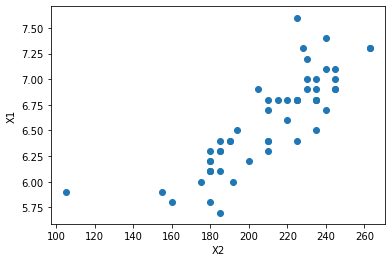

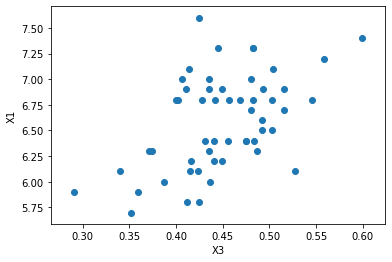

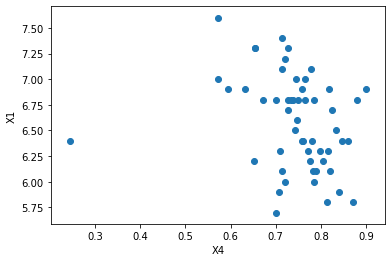

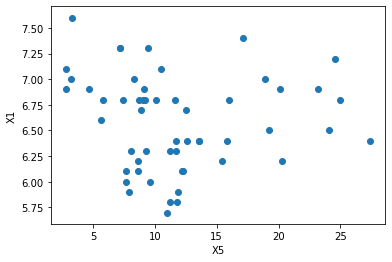

In [3]:
#now we check the comportment of the x1 with the other values
plt.scatter(df['X2'], df['X1'])
plt.ylabel('X1')
plt.xlabel('X2')
plt.show()

plt.scatter(df['X3'], df['X1'])
plt.ylabel('X1')
plt.xlabel('X3')
plt.show()

plt.scatter(df['X4'], df['X1'])
plt.ylabel('X1')
plt.xlabel('X4')
plt.show()

plt.scatter(df['X5'], df['X1'])
plt.ylabel('X1')
plt.xlabel('X5')
plt.show()


we can see that, x1 form a linear regression with x2 and x3 but not with x4 and x5

In [4]:
#taking 20% of the data as test and 80% as training
y = df['X1']
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)

In [5]:
x_train.head()

,X1,X2,X3,X4,X5
4,6.9,205,0.449,0.900,23.2
29,6.5,235,0.492,0.742,24.1
45,5.9,105,0.359,0.839,7.9
10,6.9,245,0.516,0.632,20.1
44,7.0,235,0.480,0.744,18.9


In [6]:
lab_enc = preprocessing.LabelEncoder()
encoded_y = lab_enc.fit_transform(y_train)
print(encoded_y)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(encoded_y))

[12  8  2 12 13  4 11 11 11 14  6  0 17 13  4 10  3 12 15  7 10 12 16  5
  2 11  5 13 14 11  7 11 18 16  4  1 16  7  7  6 11  9 12]
continuous
multiclass
multiclass


In [7]:
#after getting the trianing and test, we perform a knn on the dataset
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(x_train, encoded_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
#we checking how our model works
knn_pred = knn.predict(x_test) 
knn_pred

array([ 0,  0,  4,  4,  4,  3,  0,  4,  0, 11,  6], dtype=int64)

In [10]:
#now we perform a ridge regression on our data
ridge = Ridge(alpha = 0.01)
ridge.fit(x_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [11]:
#we check how our model perform
ridge_pred = ridge.predict(x_test)
ridge_pred

array([6.30038479, 6.3998778 , 6.00063246, 6.29985935, 5.80158282,
       6.49973235, 6.39982381, 6.20020723, 6.10082123, 6.80091616,
       6.79921112])

In [16]:
#calculating the mean squared error on the values on the ridge regression
mean_squared_error(y_test,ridge_pred)

4.881677146890674e-07

In [18]:
#calculating the mean squared error on the values on the knn 
mean_squared_error(y_test, knn_pred)

18.79272727272727

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()

Explique e discuta sobre os resultados encontrados no campo abaixo.

YOUR ANSWER HERE

comparing the mean squared error on the data, we can see that, the knn regression report a high error on our dataset. with that, we can say that the ridge regression has a better comportment than the knn regression